#### scicap dataset
source: https://huggingface.co/datasets/CrowdAILab/scicap/tree/main


#### LLAVA model
using LLaVA-v1.5-13B <br>
source: https://huggingface.co/docs/transformers/main/en/model_doc/llava

In [3]:
!pip install transformers datasets huggingface_hub evaluate

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 547.8/547.8 kB 6.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.1/84.1 kB 8.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.8/40.8 MB 41.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 18.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.9/64.9 kB 11.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 30.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 21.9 MB/s eta 0:00:00
  Attempting uninstall: requests
    Found existing installation: requests 2.31.0
    Uninstalling requests-2.31.0:
      Successfully uninstalled requests-2.31.0
  Attempting uninstall: pyarrow
    Found existing installation: pyarrow 14.0.2
    Uninstalling pyarrow-14.0.2:
      Successfully uninstalled pyarrow-14.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed

In [1]:
!pip show transformers

Name: transformers
Version: 4.41.2
Summary: State-of-the-art Machine Learning for JAX, PyTorch and TensorFlow
Home-page: https://github.com/huggingface/transformers
Author: The Hugging Face team (past and future) with the help of all our contributors (https://github.com/huggingface/transformers/graphs/contributors)
Author-email: transformers@huggingface.co
License: Apache 2.0 License
Location: /usr/local/lib/python3.10/dist-packages
Requires: filelock, huggingface-hub, numpy, packaging, pyyaml, regex, requests, safetensors, tokenizers, tqdm
Required-by: 


In [2]:
import os
import pandas as pd
import numpy as np
import torch
from datasets import load_dataset
from PIL import Image
import requests
from transformers import AutoProcessor, LlavaForConditionalGeneration

#### init transformers model from_pretarained()

llava-hf/llava-1.5-7b-hf

In [3]:
model = LlavaForConditionalGeneration.from_pretrained("llava-hf/llava-1.5-7b-hf")
processor = AutoProcessor.from_pretrained("llava-hf/llava-1.5-7b-hf")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/transformers/models/llava/configuration_llava.py:100: FutureWarning: The `vocab_size` argument is deprecated and will be removed in v4.42, since it can be inferred from the `text_config`. Passing this argument has no effect
  warnings.warn(


Loading checkpoint shards:   0%|          | 0/3 [00:00<?, ?it/s]

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


### Dataset Preparation

download scicap snapshot

[tree/main](https://huggingface.co/datasets/CrowdAILab/scicap/tree/main)

In [4]:
from huggingface_hub import snapshot_download

os.makedirs("data", exist_ok=True)
dir_ = "data/"
snapshot_download(repo_id="CrowdAILab/scicap", repo_type='dataset', local_dir=dir_)

Fetching 23 files:   0%|          | 0/23 [00:00<?, ?it/s]

'/content/data'

In [5]:
# from datasets import load_dataset
# dataset = load_dataset("CrowdAILab/scicap")

In [6]:
# merge all split in one
# !zip -F data/img-split.zip --out img.zip

In [7]:
# os.makedirs("images", exist_ok=True)
# !unzip img.zip -d images

In [8]:
def print_dir_(directory):
    for root, dirs, files in os.walk(directory):
        level = root.replace(directory, '').count(os.sep)
        print(root)
        print(f"count: {len(files)}")

dir_pth = "images/"
print_dir_(dir_pth)

images/
count: 0
images/share-task-img-mask
count: 0
images/share-task-img-mask/arxiv
count: 0
images/share-task-img-mask/arxiv/val
count: 47639
images/share-task-img-mask/arxiv/train
count: 333472
images/share-task-img-mask/arxiv/test
count: 47639
images/share-task-img-mask/acl
count: 26868


plot sample graphs

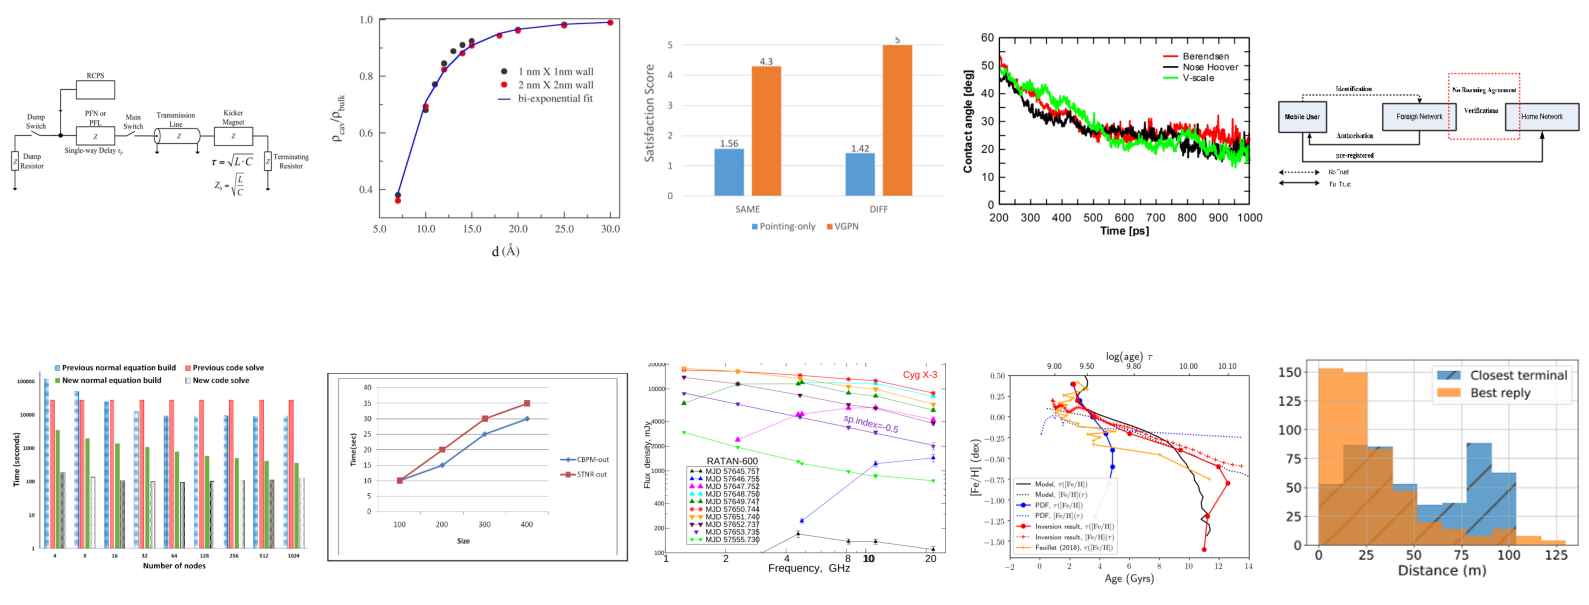

In [9]:
import random
import matplotlib.pyplot as plt
from PIL import Image

random.seed(23)
im_dir = f"images/share-task-img-mask/arxiv/train"
im_files = [os.path.join(im_dir, f) for f in os.listdir(im_dir) if f.endswith(".png")]

# random sample images
num_im = 10
samp_im = random.sample(im_files, num_im)

fig, axes = plt.subplots(2, 5, figsize=(16, 8))
axes = axes.flatten()

for i, im_pth in enumerate(samp_im):
    image = Image.open(im_pth)
    axes[i].imshow(image)
    axes[i].axis("off")

plt.tight_layout()
plt.show()

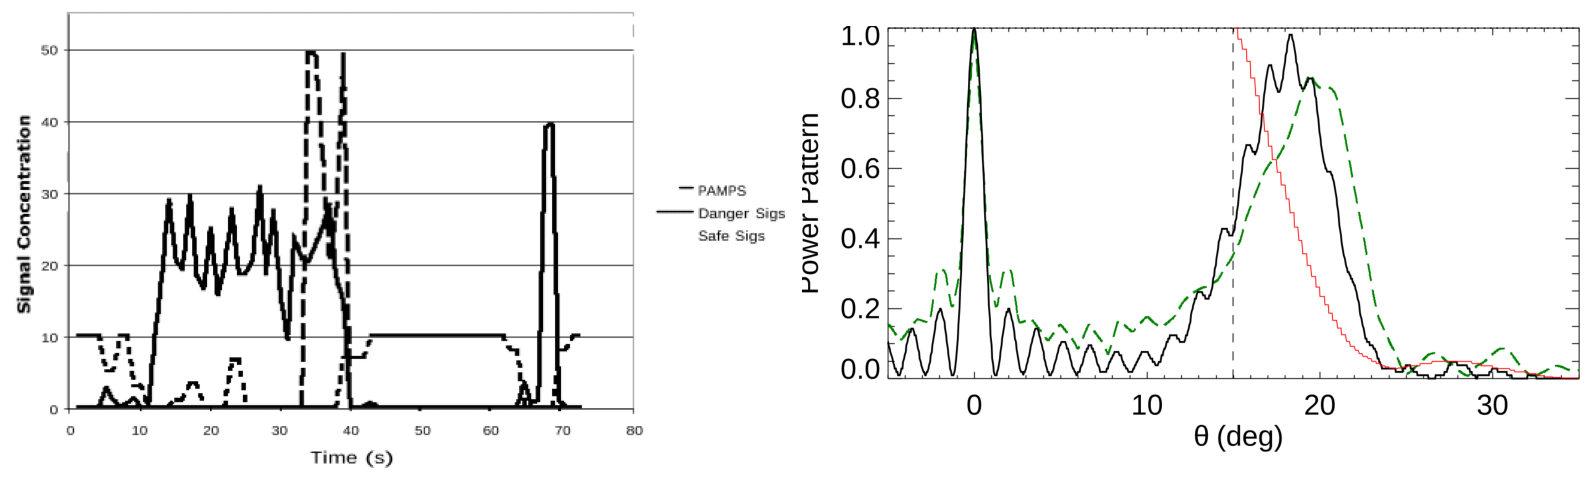

In [12]:
random.seed(27)
num_im = 2
samp_im = random.sample(im_files, num_im)

fig, axes = plt.subplots(1,2, figsize=(16, 8))
axes = axes.flatten()

for i, im_pth in enumerate(samp_im):
    image = Image.open(im_pth)
    axes[i].imshow(image)
    axes[i].axis("off")

plt.tight_layout()
plt.show()

In [13]:
samp_im

['images/share-task-img-mask/arxiv/train/000000644878.png',
 'images/share-task-img-mask/arxiv/train/000000805025.png']

In [42]:
print(next(model.parameters()).device)

cpu


In [43]:
prompt = "USER: <image>\nWhat is the content of this scientific graph? Describe in detail. ASSISTANT:"
inputs = processor(text=prompt, images=Image.open(samp_im[0]), return_tensors="pt")
generate_ids = model.generate(**inputs, max_new_tokens=15)
processor.batch_decode(generate_ids, skip_special_tokens=True, clean_up_tokenization_spaces=False)[0]

'USER:  \nWhat is the content of this scientific graph? Describe in detail. ASSISTANT: The scientific graph displays a three-dimensional representation of a molecule,'

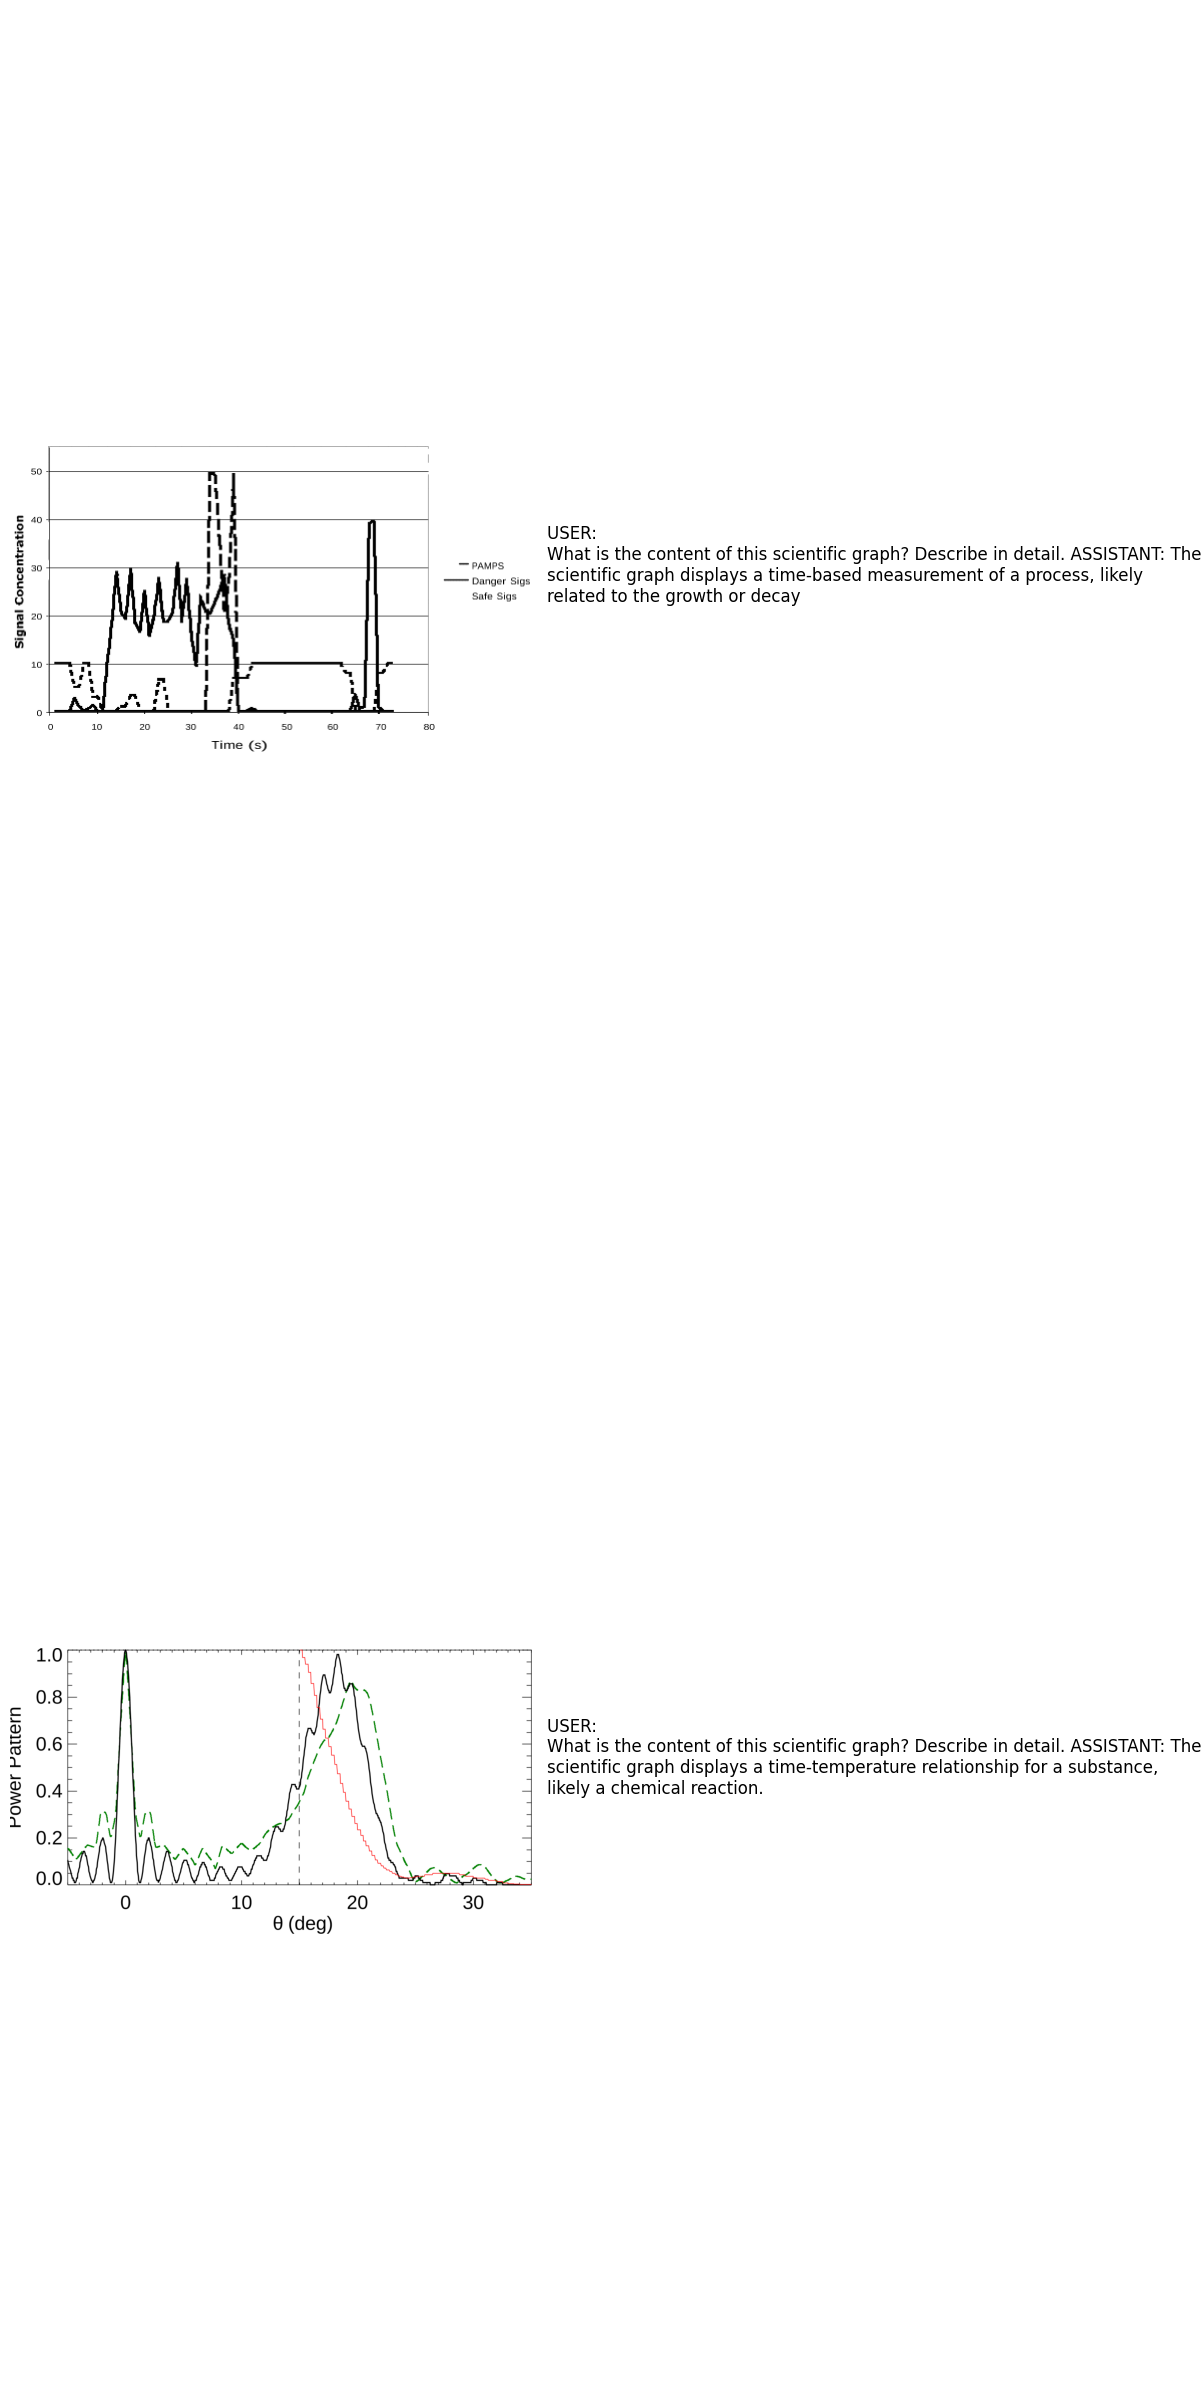

In [15]:
# generate captions for sample images
# device = "cuda" if torch.cuda.is_available() else "cpu"
# model.to(device)

fig, axes = plt.subplots(num_im, 2, figsize=(12, 24))

prompt = "USER: <image>\nWhat is the content of this scientific graph? Describe in detail. ASSISTANT:"

for i, im_pth in enumerate(samp_im):
    im_ = Image.open(im_pth)

    axes[i, 0].imshow(im_)
    axes[i, 0].axis("off")

    # process inputs -> tokenize text and preprocess images
    # inputs = processor(images=im_, return_tensors="pt").to(device)
    inputs = processor(text=prompt, images=im_, return_tensors="pt")

    # input_ids = processor.tokenizer.encode(prompt, return_tensors="pt").to(device)

    # sample and generate captions
    # possible sampling options -> beam_search, greedy_decoding, top_p(nucleus sampling), temperature_scaling
    output = model.generate(
        **inputs,
        # pixel_values=inputs.pixel_values,
        max_new_tokens=20, # max gen len
        # num_beams=4, ## beam size 4
        # early_stopping=True
    )

    # decode
    caption = processor.tokenizer.decode(output[0], skip_special_tokens=True, clean_up_tokenization_spaces=False)

    axes[i, 1].text(0, 0.5, caption, fontsize=12, wrap=True)
    axes[i, 1].axis("off")

plt.tight_layout()
plt.show()

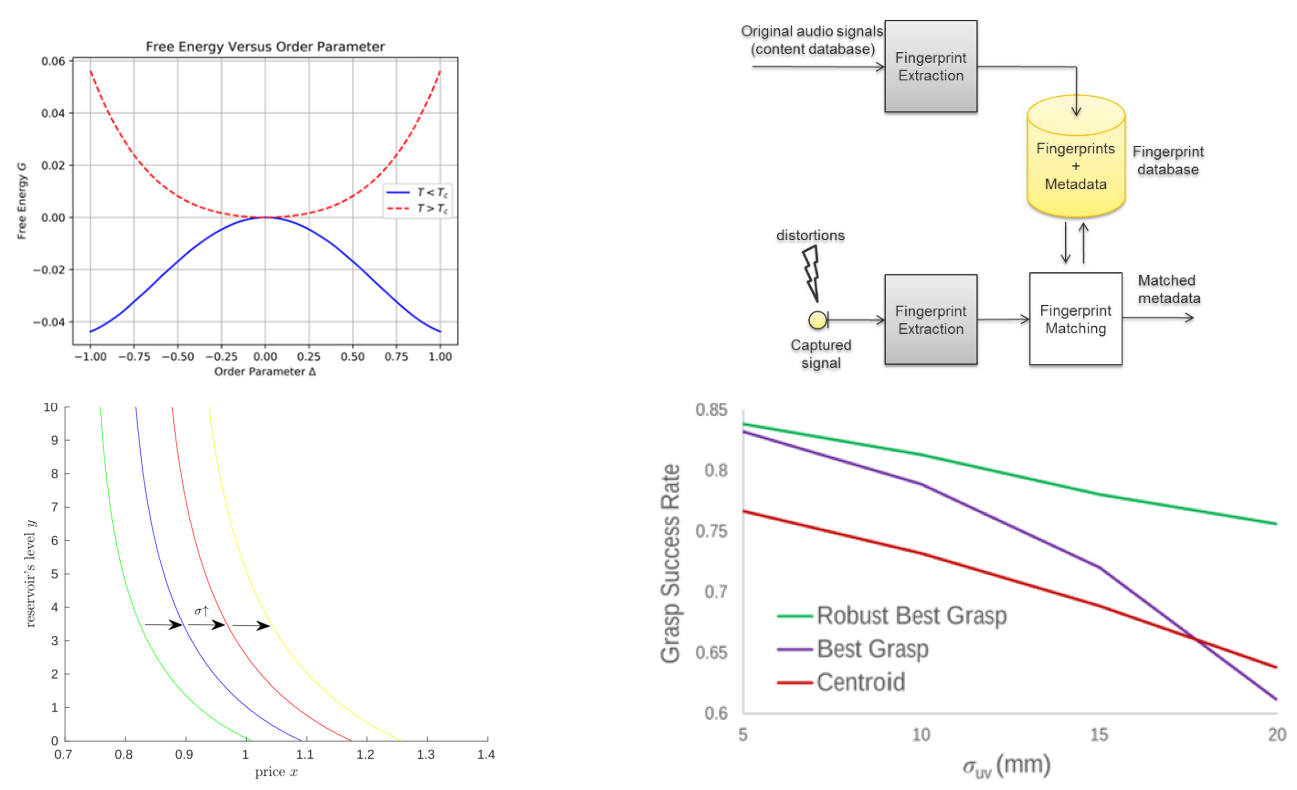

In [16]:
random.seed(32)
num_im = 4
samp_im = random.sample(im_files, num_im)

fig, axes = plt.subplots(2,2, figsize=(16, 8))
axes = axes.flatten()

for i, im_pth in enumerate(samp_im):
    image = Image.open(im_pth)
    axes[i].imshow(image)
    axes[i].axis("off")

plt.tight_layout()
plt.show()

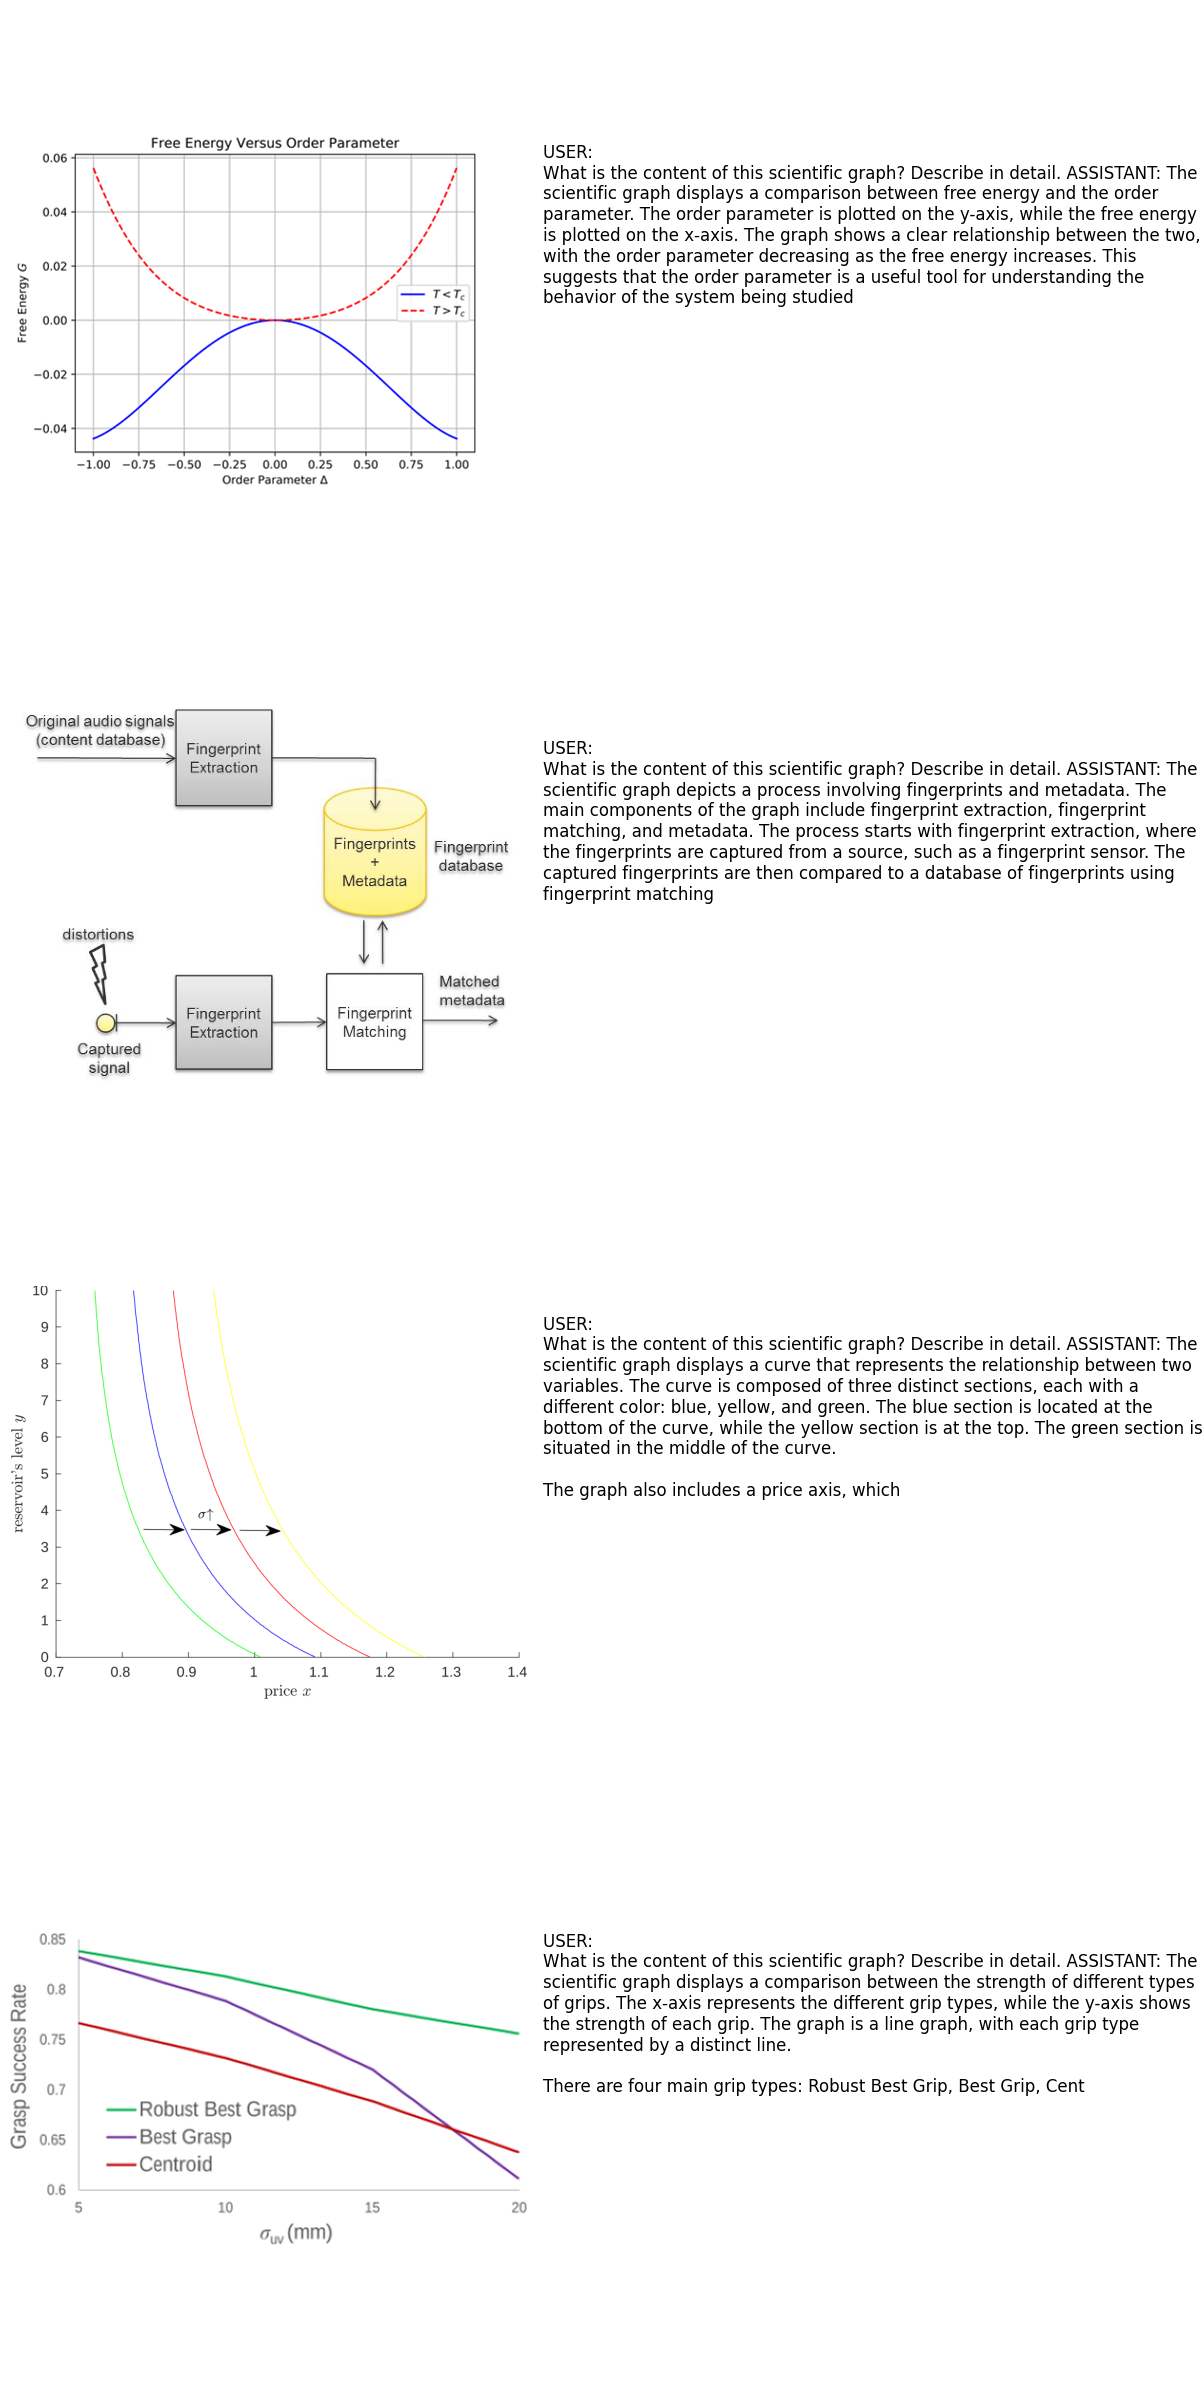

In [19]:
# generate captions for sample images
# device = "cuda" if torch.cuda.is_available() else "cpu"
# model.to(device)

fig, axes = plt.subplots(num_im, 2, figsize=(12, 24))

prompt = "USER: <image>\nWhat is the content of this scientific graph? Describe in detail. ASSISTANT:"

for i, im_pth in enumerate(samp_im):
    im_ = Image.open(im_pth)

    axes[i, 0].imshow(im_)
    axes[i, 0].axis("off")

    # process inputs -> tokenize text and preprocess images
    # inputs = processor(images=im_, return_tensors="pt").to(device)
    inputs = processor(text=prompt, images=im_, return_tensors="pt")

    # input_ids = processor.tokenizer.encode(prompt, return_tensors="pt").to(device)

    # sample and generate captions
    # possible sampling options -> beam_search, greedy_decoding, top_p(nucleus sampling), temperature_scaling
    output = model.generate(
        **inputs,
        # pixel_values=inputs.pixel_values,
        max_new_tokens=80, # max gen len
        # num_beams=4, ## beam size 4
        # early_stopping=True
    )

    # decode
    caption = processor.tokenizer.decode(output[0], skip_special_tokens=True, clean_up_tokenization_spaces=False)

    axes[i, 1].text(0, 0.5, caption, fontsize=12, wrap=True)
    axes[i, 1].axis("off")

plt.tight_layout()
plt.show()

#### next steps
- LoRA
- quantized models
- compare different sampling strategy
- compare diff sized models?
- write a wrapper to store results in csv
- evaluate fine-tuned model on BLEU score